# Importing Libraries

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the DataSet

**H1** = Resort Hotel

**H2** = City Hotel

In [108]:
h1 = pd.read_csv('../data/H1.csv')

h1.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [109]:
h2 = pd.read_csv('../data/H2.csv')

h2.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


**Note:** Both dataframes have the same size and structure, let's concact it and create a new column so we know where the data comes from

In [110]:
#h1['Hotel'] = 'Resort Hotel'

#first_column = h1.pop('Hotel')
#h1.insert(0, 'Hotel', first_column)

# Create a new column Hotel and fills it with 'Resort Hotel', then set_index move it to the index
# of the DataFrame and reset_index resets the index to the default integer index, thus moving 'Hotel'
# column to the first position
h1 = h1.assign(Hotel='Resort Hotel').set_index('Hotel').reset_index()

In [111]:
h2 = h2.assign(Hotel='City Hotel').set_index('Hotel').reset_index()

In [112]:
df = pd.concat([h1, h2])

# Exploratory Data Analysis and Data Cleaning

**Initial EDA**

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, 0 to 79329
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Hotel                        119390 non-null  object 
 1   IsCanceled                   119390 non-null  int64  
 2   LeadTime                     119390 non-null  int64  
 3   ArrivalDateYear              119390 non-null  int64  
 4   ArrivalDateMonth             119390 non-null  object 
 5   ArrivalDateWeekNumber        119390 non-null  int64  
 6   ArrivalDateDayOfMonth        119390 non-null  int64  
 7   StaysInWeekendNights         119390 non-null  int64  
 8   StaysInWeekNights            119390 non-null  int64  
 9   Adults                       119390 non-null  int64  
 10  Children                     119386 non-null  float64
 11  Babies                       119390 non-null  int64  
 12  Meal                         119390 non-null  object 
 13  Count

**Note:** We got some null vales in Children and Country, let's see if there's more null values in the columns that didn't appear on .info()

In [114]:
df[df.columns[df.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, 0 to 79329
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Children  119386 non-null  float64
 1   Country   118902 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.7+ MB


Only Children and Country have null values, let's take a better look at our columns names

In [115]:
df.columns

Index(['Hotel', 'IsCanceled', 'LeadTime', 'ArrivalDateYear',
       'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

**Note:** ReservationStatusDate is a object, we need to change it to datetime

In [116]:
df['ReservationStatusDate'] = pd.to_datetime(df['ReservationStatusDate'])

In [117]:
df.shape

(119390, 32)

In [118]:
df.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798,NaN


**Note 1:** We have some outliers in lots of columns: "Adults"; "Children"; "Babies", "ADR", but at the moment only the ADR column is a problem, so i need to fix there first.

**Note 2:** We still have in the dataframe a lot of object type, we can use describe to see them better

Let's try to use Interquartile Range (IQR) to handle the outliers

In [119]:
Q1 = df['ADR'].quantile(0.25)
Q3 = df['ADR'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

upper_bound

211.065

In [120]:
df_high_adr = df[df['ADR'] > 211.065]

df_high_adr['ADR']

140      225.00
303      213.75
396      230.67
412      216.13
523      249.00
          ...  
79191    235.00
79229    236.33
79279    229.00
79305    266.75
79326    225.43
Name: ADR, Length: 3793, dtype: float64

Using IQR would exclude 3793 entries, let's try to visualize better the outliers

In [121]:
df_high_adr = df[df['ADR'] > 400]

df_high_adr['ADR']

13142     450.00
13391     437.00
15083     508.00
39155     426.25
39568     402.00
8455     5400.00
63852     451.50
71343     510.00
Name: ADR, dtype: float64

Seeing that we have only 1 huge outliers, i'm gonna exclude only him

In [122]:
df = df[df['ADR']<5000]

Now we're gonna take a look in the others object type in the dataframe, to see if there's a need to change any other

In [123]:
df.describe(include='object')

,Hotel,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,Agent,Company,CustomerType,ReservationStatus
count,119389,119389,119389,118901,119389,119389,119389,119389,119389,119389,119389,119389,119389
unique,2,12,5,177,8,5,10,12,3,334,353,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,NULL,Transient,Check-Out
freq,79329,13877,92309,48589,56477,97869,85993,74052,104641,31961,112592,89612,75166


In [124]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

Hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
ArrivalDateMonth
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
Meal
['BB       ' 'FB       ' 'HB       ' 'SC       ' 'Undefined']
--------------------------------------------------
Country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 

Everything seems to be ok, let's keep going!

### Data Analysis and Visualizations

Gonna start seeing the percentage of cancelled bookings

IsCanceled
0    0.629589
1    0.370411
Name: proportion, dtype: float64


<BarContainer object of 2 artists>

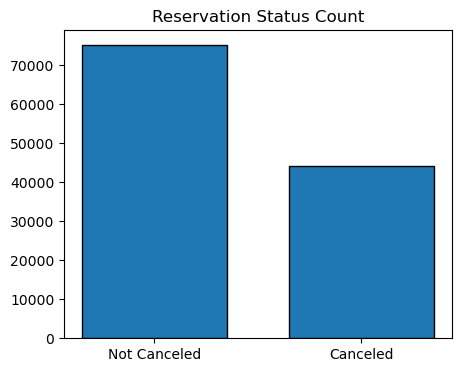

In [125]:
cancelled_perc = df['IsCanceled'].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize= (5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Canceled', 'Canceled'], df['IsCanceled'].value_counts(), edgecolor = 'k', width= 0.7)

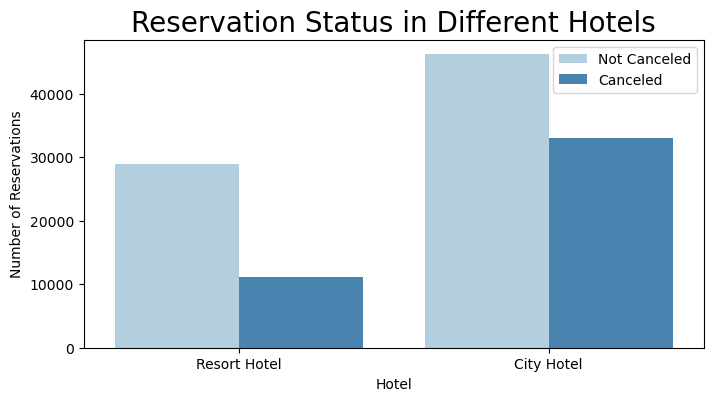

In [126]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x= 'Hotel', hue= 'IsCanceled', data = df, palette = 'Blues')
handles, _ = ax1.get_legend_handles_labels()
ax1.legend(handles, ['Not Canceled', 'Canceled'], bbox_to_anchor=(1,1))
plt.title('Reservation Status in Different Hotels', size=20)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations');

I want to see the percentage of Canceled Reservations per Hotel

In [127]:
cancelled_perc = df.groupby('Hotel')['IsCanceled'].value_counts(normalize=True)
print(cancelled_perc)

Hotel         IsCanceled
City Hotel    0             0.582738
              1             0.417262
Resort Hotel  0             0.722366
              1             0.277634
Name: proportion, dtype: float64


In [128]:
resort_hotel = df[df['Hotel'] == 'Resort Hotel'].groupby('ReservationStatusDate')['ADR'].mean()
city_hotel = df[df['Hotel'] == 'City Hotel'].groupby('ReservationStatusDate')['ADR'].mean()

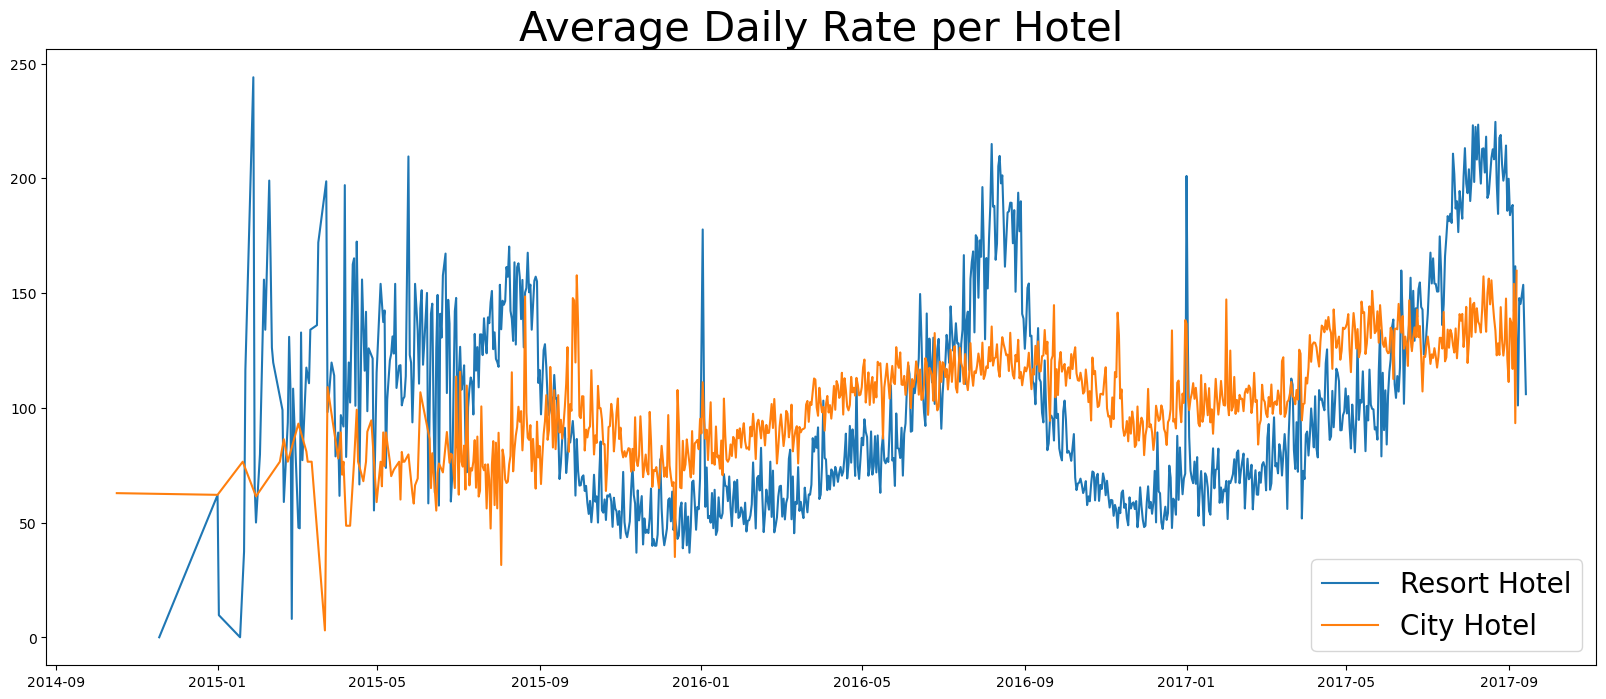

In [129]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate per Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel, label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel, label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

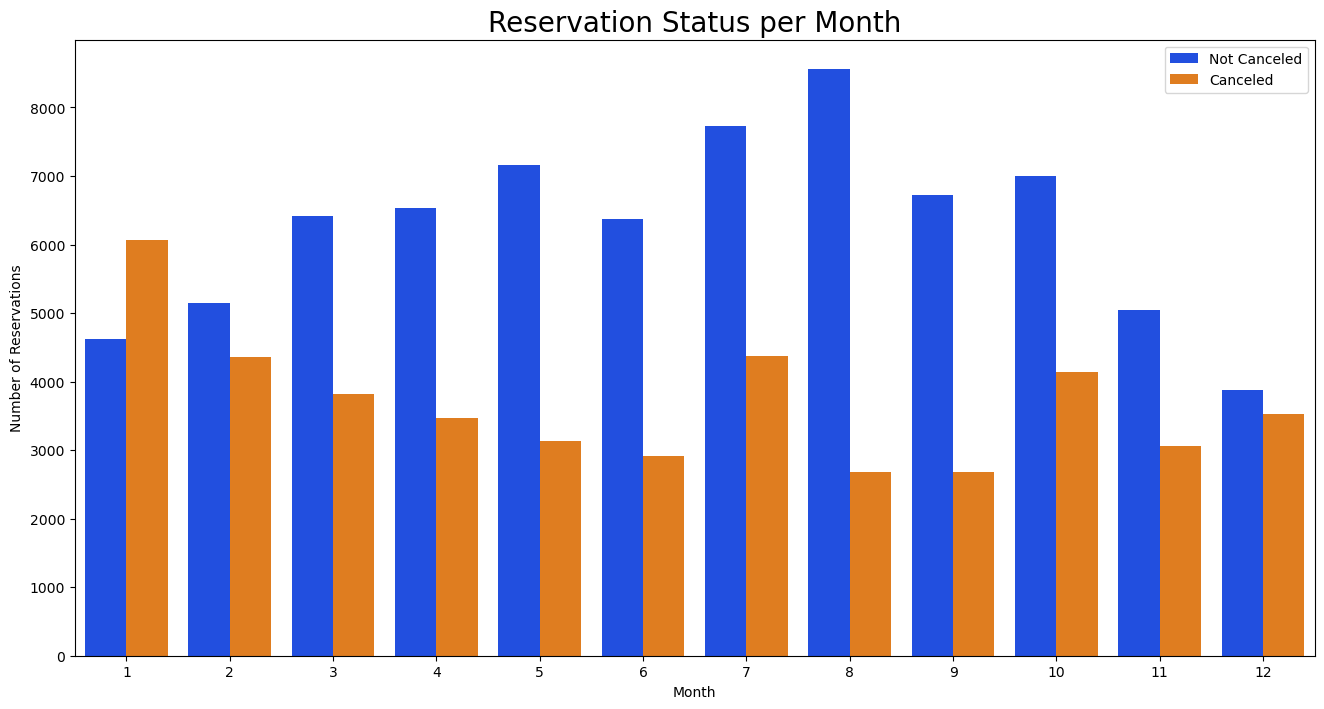

In [141]:
df['Month'] = df['ReservationStatusDate'].dt.month
plt.figure(figsize=(16,8))
ax1 = sns.countplot(x = 'Month', hue = 'IsCanceled', data = df, palette = 'bright')
handles, _ = ax1.get_legend_handles_labels()
ax1.legend(handles, ['Not Canceled', 'Canceled'], bbox_to_anchor=(1,1))
plt.title('Reservation Status per Month', size=20)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.show()

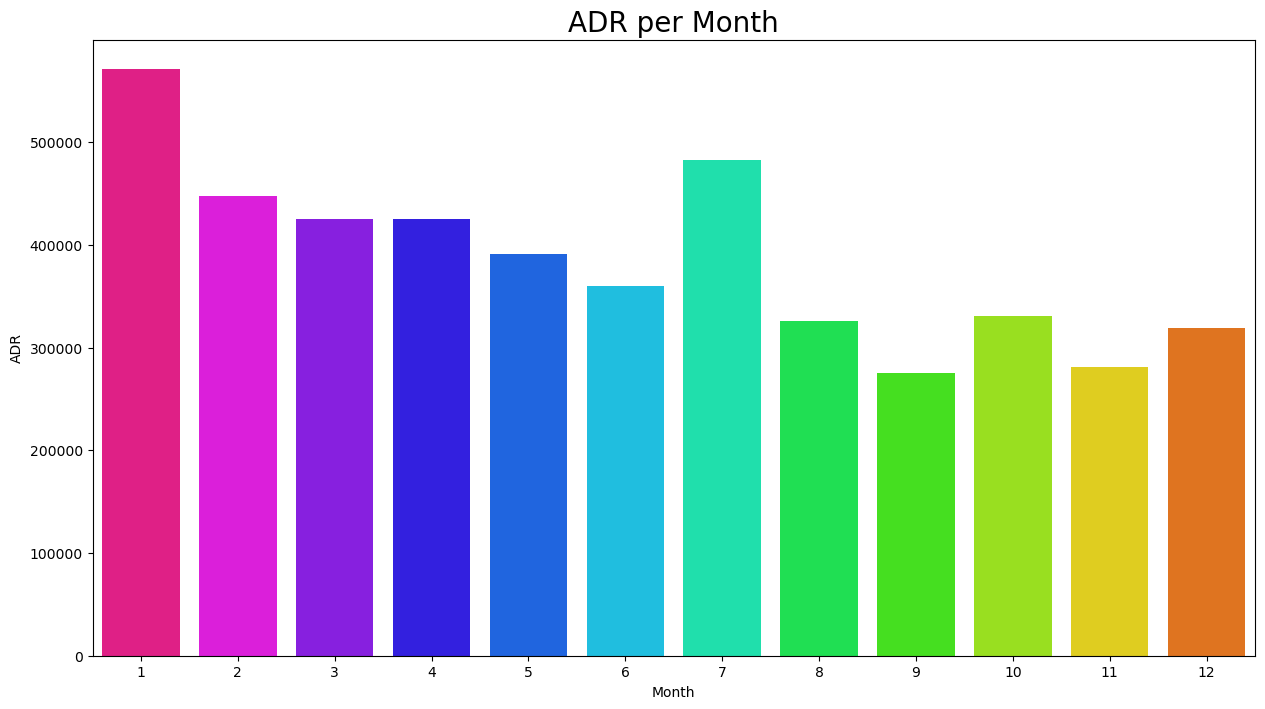

In [146]:
plt.figure(figsize = (15,8))
plt.title('ADR per Month', fontsize= 20)
data = df[df['IsCanceled'] == 1].groupby('Month')[['ADR']].sum().reset_index()
sns.barplot(x='Month', y='ADR', data=data, palette='hsv_r')
plt.show()